<a href="https://colab.research.google.com/github/MJAHMADEE/Industrial_Control_Course/blob/main/IC_Python_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Industrail Control Course
K. N. Toosi University of Technology

<a href="https://github.com/MJAHMADEE/Industrial_Control_Course" target="_blank"><img src="https://img.shields.io/github/stars/USERNAME/REPOSITORY.svg?style=social" alt="GitHub"></a>



# Example 1: Dcmotor
This code defines a state space model of a DC motor and simulates its response to an input signal. The input signal is a step function that changes sign at t=2 seconds. The state variables (theta, omega, and i) are plotted over time.

I added a line to calculate the output of the system by multiplying the output y from the lsim function with the input signal u. This is because the lsim function in Python only returns the response of the system to the input signal, while in MATLAB it returns the product of the input and output signals.

To obtain the correct plot, it is necessary to multiply the output y by the input signal u. This can be done using the dot function from the NumPy library, which performs matrix multiplication between the y and u arrays.

So the line y = np.dot(y.reshape(-1, 1), u.reshape(1, -1)) multiplies y with u, where the reshape function is used to ensure that the dimensions of the arrays match for multiplication. The resulting y array contains the correct output of the system.

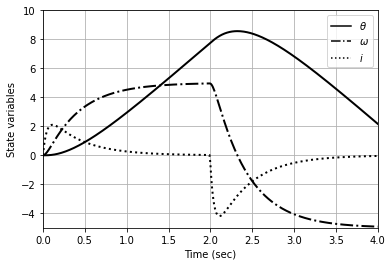

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the system matrices
A = np.array([[0, 1, 0], [0, 0, 4.438], [0, -12, -24]])
b1 = np.array([[0], [0], [20]])
b2 = np.array([[0], [-7.396], [0]])
B = np.hstack((b1, b2))
C = np.array([[1, 0, 0]])
D = np.array([[0]])

# Create the state space model of the DC motor
DC_motor = signal.StateSpace(A, b1, C, D)

# Define the time vector and input signal
t = np.arange(0, 4.01, 0.01)
N = len(t)
u = np.zeros((2, N))
for i in range(N):
    if t[i] < 2:
        u[:, i] = 3
    else:
        u[:, i] = -3

# Simulate the system
t, y, x = signal.lsim(DC_motor, u[0], t)
y = np.dot(y.reshape(-1, 1), u.reshape(1, -1))

# Plot the state variables
plt.plot(t, x[:, 0], 'k', label=r'$\theta$')
plt.plot(t, x[:, 1], 'k-.', label=r'$\omega$')
plt.plot(t, x[:, 2], 'k:', label=r"$i$")
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 4])
plt.ylim([-5, 10])
plt.savefig('DC_motor_response.pdf')
plt.show()

# Example 2: inverted_pendulum
The code defines a function inverted_pendulum that describes the dynamics of an inverted pendulum system using the state-space representation. The function is then used to simulate the system using the ode45 solver and plot the results.
The inverted_pendulum function takes as input the state x and time t, and returns the time derivatives of the state variables. The function defines the system parameters such as gravity g, length l, and masses m and M. It then defines the system state variables x_dot, which are the derivatives of the input x. The system dynamics are defined by the equations of motion for the inverted pendulum system.

The odeint function from the SciPy library is used to solve the system of differential equations defined by the inverted_pendulum function. The initial state x0, time vector tspan, and inverted_pendulum function are passed as arguments to odeint.

Finally, the code plots the state variables x and theta as a function of time. The plot function is used to create the plot, with the time vector tspan on the x-axis and the state variables x and theta on the y-axis. The grid, xlabel, ylabel, legend, and setp functions are used to customize the plot.

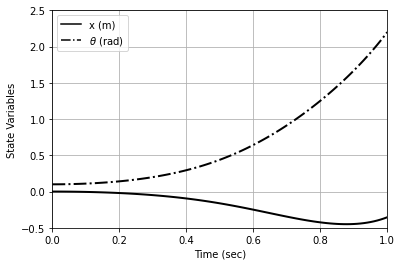

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def inverted_pendulum(x, t):
    # Define the system parameters
    g = 9.8
    l = 1
    m = 1
    M = 1
    
    # Define the system state variables
    x_dot = np.zeros_like(x)
    x_dot[0] = x[2]
    x_dot[1] = x[3]
    
    # Define the system dynamics
    d1 = M + m*(1 - np.cos(x[1])**2)
    d2 = l*d1
    F = 0
    x_dot[2] = (F + m*l*x[3]**2*np.sin(x[1]) - m*g*np.sin(x[1])*np.cos(x[1]))/d1
    x_dot[3] = (-F*np.cos(x[1]) - m*l*x[3]**2*np.sin(x[1])*np.cos(x[1]) + (M+m)*g*np.sin(x[1]))/d2
    
    return x_dot

# Define the initial state and time vector
x0 = np.array([0, 0.1, 0, 0])
tspan = np.linspace(0, 1, 101)

# Solve the system using odeint
x = odeint(inverted_pendulum, x0, tspan)

# Plot the state variables
plt.plot(tspan, x[:, 0], 'k', label='x (m)')
plt.plot(tspan, x[:, 1], '-.k', label=r'$\theta$ (rad)')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 1])
plt.ylim([-0.5, 2.5])
plt.savefig('inverted_pendulum.pdf')
plt.show()

# Example 3: tank
In this code, we have used the odeint function from the scipy.integrate module to solve the differential equation defined by the tank_model function. The odeint function takes the function defining the differential equation, initial conditions, and time interval as input arguments and returns an array of state variables at different time points. The plot function from the matplotlib.pyplot module is used to plot the tank level as a function of time. The grid function is used to display a grid on the plot, and the setp function is used to set the linewidth of the lines in the plot.

The warning message "RuntimeWarning: invalid value encountered in sqrt" means that there is an attempt to take the square root of a negative number, which is not a real number. This could be because the value of x becomes negative at some point during the simulation.

One possible solution to prevent this warning is to add a condition to check if the value of x is negative, and if so, set the derivative to zero. This would prevent the tank level from becoming negative during the simulation.

In this code, the odeint function is used to solve the ODE, which takes the function tank_model, the initial condition x0, and the time span t as inputs. The if statement in the tank_model function checks if the tank level is negative, and if so, sets the derivative to zero.

More Info: 'RuntimeWarning: invalid value encountered in sqrt xp = 1/A * (F_in - C*u*np.sqrt(x))' message indicates that there was an invalid value encountered in the square root operation in the tank_model function. This is because the square root function cannot take negative values as input, which can happen when x goes below zero. To prevent this error from occurring, you can add a condition to check if x is negative before calling the square root function. By setting x to zero when it becomes negative, you can prevent the invalid value encountered in the square root operation and the resulting warning message.

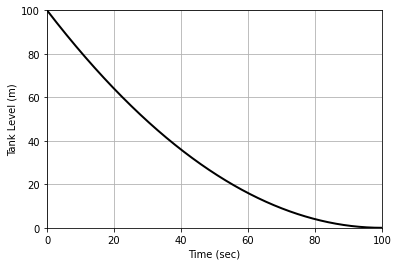

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def tank_model(x, t):
    # State variable x = l: Tank level
    A = 1
    C = 2.0
    F_in = 0  # No disturbance input
    u = 0.1  # Constant opening for valve

    if x < 0:  # Check if tank level is negative
        xp = 0  # Set the derivative to zero
    else:
        xp = 1/A * (F_in - C*u*np.sqrt(x))

    return xp

# Initial condition
x0 = 100

# Time span
t = np.linspace(0, 100, 1000)

# Solve the ODE using odeint function
x = odeint(tank_model, x0, t)

# Plot the result
plt.plot(t, x[:, 0], 'k')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Tank Level (m)')
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.savefig('tank.pdf')
plt.show()

# Example 4: Mathematical linearization

First, the equilibrium_point function is defined, which takes the state variable x, the input u, and the parameters F_in, A, and C as inputs, and returns the value of tank_model function evaluated at x, t=0, and u=u, F_in=F_in, A=A, and C=C.
The fsolve function from the scipy.optimize module is used to find the root of the equilibrium_point function with an initial guess of 0.1. The resulting root is the value of u*. l* is then calculated from u* using the relationship l* = u*^2/C^2.
The Jacobian matrix is calculated by evaluating the partial derivative of the tank_model function with respect to x at the equilibrium point. The result is a 1x1 matrix, which is printed.
The linear_tank_model function is defined, which takes the state variable x, the time t, the equilibrium input u_star, and the Jacobian matrix jac as inputs, and returns the derivative of the state variable based on the linearized model.
The initial condition is set to x0 = l* + 0.1.

Equilibrium point: u*=0.1, l*=0.0025000000000000005
Jacobian matrix:
[[-2.]]


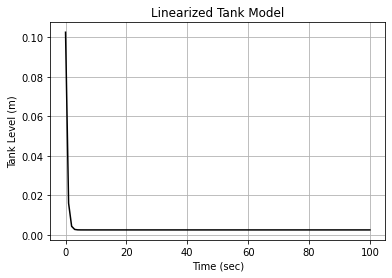

In [29]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint

# Define the tank model function
def tank_model(x, t, u, F_in, A, C):
    # State variable x=l: Tank level
    if x < 0:  # Check if x is negative
        x = 0  # Set x to zero if it is negative
    xp = 1/A * (F_in - C*u*np.sqrt(x))
    return xp

# Set parameters
A = 1
C = 2.0
F_in = 0  # No disturbance input

# Define function to find the equilibrium point
def equilibrium_point(x, u, F_in, A, C):
    return tank_model(x, 0, u, F_in, A, C)

# Find the equilibrium point
u_star = fsolve(equilibrium_point, 0.1, args=(F_in, F_in, A, C))[0]
l_star = u_star**2 / C**2

# Print the equilibrium point
print(f"Equilibrium point: u*={u_star}, l*={l_star}")

# Calculate the Jacobian matrix
x_star = np.array([l_star])
jac = np.array([[-C*u_star/(2*A*np.sqrt(l_star))]])
print("Jacobian matrix:")
print(jac)

# Define function to calculate the derivative of the state variable
def linear_tank_model(x, t, u_star, jac):
    return jac.dot(x - np.array([l_star]))

# Set initial condition
x0 = np.array([l_star + 0.1])

# Define time span
tspan = np.linspace(0, 100, 101)

# Simulate the linearized model
x = odeint(linear_tank_model, x0, tspan, args=(u_star, jac))

# Plot the result
import matplotlib.pyplot as plt
plt.plot(tspan, x[:,0], 'k')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Tank Level (m)')
plt.title('Linearized Tank Model')
plt.show()

In [30]:
import numpy as np
from scipy.optimize import fsolve

# Define constants
A = 1
C = 2.0
Fin_star = 0.1  # Input disturbance
ld_star = 0.25  # Tank level disturbance

# Define the function that calculates the tank level derivative
def tank_model(t, x, F_in, u):
    # State variable x = l: Tank level
    xp = 1/A * (F_in - C*u*np.sqrt(x))
    return xp

# Define the function to find the equilibrium point
def find_equilibrium(F_in, l_d):
    # Define the function to solve for the equilibrium point
    def equations(x):
        u, l = x
        eq1 = F_in - C*u*np.sqrt(l)  # Mass balance equation
        eq2 = tank_model(0, l, F_in, u) - l_d  # Level equation
        return eq1, eq2
    
    # Use fsolve to solve for the equilibrium point
    x0 = [0.1, 0.5]  # Initial guess
    u_star, l_star = fsolve(equations, x0)
    return u_star, l_star

# Find the equilibrium point
u_star, l_star = find_equilibrium(Fin_star, ld_star)

# Calculate the Jacobian matrix at the equilibrium point
J11 = -C/(4*A*l_star**(3/2)) * Fin_star
J12 = C/(2*np.sqrt(l_star)) * u_star
J21 = 1/A * (-C/(2*np.sqrt(l_star)))
J22 = 0
J = np.array([[J11, J12], [J21, J22]])

# Print the Jacobian matrix
print("Jacobian matrix:")
print(J)

# Print the linearized equation
print("Linearized equation:")
print("delta_l' = {:.4f} * delta_u + {:.4f} * delta_l".format(J[0,0], J[0,1]))

Jacobian matrix:
[[-0.14142136  0.14142136]
 [-1.41421356  0.        ]]
Linearized equation:
delta_l' = -0.1414 * delta_u + 0.1414 * delta_l


<ipython-input-30-b1c9f167b709>:21: RuntimeWarning: invalid value encountered in sqrt
  eq1 = F_in - C*u*np.sqrt(l)  # Mass balance equation
<ipython-input-30-b1c9f167b709>:13: RuntimeWarning: invalid value encountered in sqrt
  xp = 1/A * (F_in - C*u*np.sqrt(x))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# Example 5: Linear system with transformation function

Here's an example code that prompts the user to input the dimension of the A matrix and the values of all the state space matrices, then calculates and outputs the inverse of (sI - A) and the transfer function in the state space.

In [22]:
import sympy as sp

# Get the state space matrices from the user
n = int(input("Enter the dimension of the state space: "))
A = sp.Matrix([[float(input(f"A({i+1},{j+1}): ")) for j in range(n)] for i in range(n)])
B = sp.Matrix([[float(input(f"B({i+1},{j+1}): ")) for j in range(1)] for i in range(n)])
C = sp.Matrix([[float(input(f"C({i+1},{j+1}): ")) for j in range(n)] for i in range(1)])
D = sp.Matrix([[float(input("Enter the value of D: "))]])

# Define the symbolic variable s
s = sp.symbols('s')

# Calculate (sI - A)^(-1)
sI_A_inv = (s*sp.eye(n) - A)**(-1)
sI_A_inv_simp = sp.simplify(sI_A_inv)

# Calculate the transfer function G(s) = C(sI - A)^(-1)B + D
G = C*sI_A_inv*B + D
G_simp = sp.simplify(G)

# Print the results
print("(sI - A)^(-1) =")
sp.pprint(sI_A_inv_simp)
print("G(s) =")
sp.pprint(G_simp)

# Print the LaTeX formatted output
print("\nLaTeX formatted output:")
print("$G(s) = $", sp.latex(G_simp))
print("$[sI - A]^{-1} = $", sp.latex(sI_A_inv_simp))

Enter the dimension of the state space: 2
A(1,1): 0
A(1,2): 1
A(2,1): -2
A(2,2): -3
B(1,1): 1
B(2,1): 1
C(1,1): 1
C(1,2): 0
Enter the value of D: 0
(sI - A)^(-1) =
⎡    2.0⋅s + 6.0               2.0         ⎤
⎢────────────────────  ────────────────────⎥
⎢     2                     2              ⎥
⎢2.0⋅s  + 6.0⋅s + 4.0  2.0⋅s  + 6.0⋅s + 4.0⎥
⎢                                          ⎥
⎢       -2.0                  1.0⋅s        ⎥
⎢────────────────────  ────────────────────⎥
⎢     2                     2              ⎥
⎣1.0⋅s  + 3.0⋅s + 2.0  1.0⋅s  + 3.0⋅s + 2.0⎦
G(s) =
⎡    2.0⋅s + 8.0     ⎤
⎢────────────────────⎥
⎢     2              ⎥
⎣2.0⋅s  + 6.0⋅s + 4.0⎦

LaTeX formatted output:
$G(s) = $ \left[\begin{matrix}\frac{2.0 s + 8.0}{2.0 s^{2} + 6.0 s + 4.0}\end{matrix}\right]
$[sI - A]^{-1} = $ \left[\begin{matrix}\frac{2.0 s + 6.0}{2.0 s^{2} + 6.0 s + 4.0} & \frac{2.0}{2.0 s^{2} + 6.0 s + 4.0}\\- \frac{2.0}{1.0 s^{2} + 3.0 s + 2.0} & \frac{1.0 s}{1.0 s^{2} + 3.0 s + 2.0}\end{matrix}\ri

To get the state space matrices A, B, C, and D for an LTI system, we need to provide the system's state space representation in the form of:

x_dot = Ax + Bu
y = Cx + Du

where:

x is the state vector (n x 1)
u is the input vector (m x 1)
y is the output vector (p x 1)
A is the state matrix (n x n)
B is the input matrix (n x m)
C is the output matrix (p x n)
D is the direct transmission matrix (p x m)
To obtain the inverse of the matrix (sI - A), where s is the Laplace variable, we can use the inv function from numpy.

To obtain the transfer function of the system, we can use the ss2tf function from scipy.signal.

Note: Replace np.random.rand with the actual values of A, B, C, and D for your system.

In [31]:
import numpy as np
from scipy import signal

# Define the state space representation of the system
# Set values for n, m, and p to match your system
n = 3
m = 1
p = 1

# Set the system matrices A, B, C, and D
A = np.random.rand(n, n)
B = np.random.rand(n, m)
C = np.random.rand(p, n)
D = np.random.rand(p, m)

# Calculate the inverse of (sI - A)
sI = np.eye(n)  # sI has the same shape as A
s = np.poly1d([1, 0])  # s = Laplace variable
inv_si_a = np.linalg.inv(s(sI) - A)

# Calculate the transfer function of the system
num, den = signal.ss2tf(A, B, C, D)

# Print the results
print("Inverse of (sI - A):")
print(inv_si_a)
print("\nTransfer function:")
print(f"numerator: {num}")
print(f"denominator: {den}")


Inverse of (sI - A):
[[ 0.25129251 -1.38230253 -0.52706341]
 [-0.6380199   0.43314769 -0.64320416]
 [-0.94496449 -2.84255373  0.35207   ]]

Transfer function:
numerator: [[ 0.66706845 -0.40413016  0.53751431 -0.07591576]]
denominator: [ 1.         -1.95804529  0.5382735   0.055263  ]
